In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np

# Discusion 6
2019

In [2]:
dm = em.Domain(2,3)
n = dm.dnodes
e = dm.delems

dm.node('1', 0.0, 0.0)
dm.node('2', 6.0, 0.0)
dm.node('3', 6.0, 8.0)
dm.node('4', 14.0, 8.0)

dm.beam('a', n['1'], n['2'])
dm.beam('b', n['2'], n['3'])
dm.beam('c', n['3'], n['4'])
dm.truss('d', n['1'], n['3'])

dm.hinge(e['a'], n['2'])
dm.hinge(e['c'], n['3'])

dm.pin(n['1'])
dm.pin(n['4'])

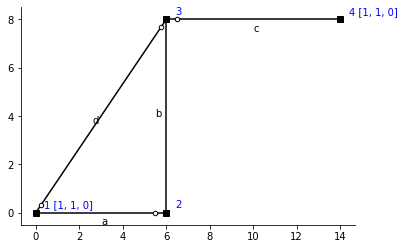

In [3]:
fig, ax = plt.subplots(1,1)
em.plot_structure(dm, ax)

In [4]:
dm.states=[]
st = dm.state()
st['v0']['d'] = 4e-3
st['v0']['a']['2'] = 1.8e-3
st['v0']['b']['2'] = 3.2e-3
st['v0']['b']['3'] = -3.2e-3

In [5]:
st['v0']

{'a': {'1': 0, '2': 0.0018, '3': 0},
 'b': {'1': 0, '2': 0.0032, '3': -0.0032},
 'c': {'1': 0, '2': 0, '3': 0},
 'd': 0.004}

In [6]:
dm.DOF = [[9, 10, 8], [1, 2, 6], [4, 5, 3], [11, 12, 7]]
B = em.B_matrix(dm)
B.sym.T

Matrix([
[   1.0,                0.0, 0.0,   0.0,   0.0, 0.0, 0.0, 0.0, -1.0,               0.0, 0.0,    0.0],
[   0.0, -0.166666666666667, 0.0,   0.0,   0.0, 0.0, 0.0, 1.0,  0.0, 0.166666666666667, 0.0,    0.0],
[   0.0,               -1.0, 0.0,   0.0,   1.0, 0.0, 0.0, 0.0,  0.0,               0.0, 0.0,    0.0],
[-0.125,                0.0, 0.0, 0.125,   0.0, 1.0, 0.0, 0.0,  0.0,               0.0, 0.0,    0.0],
[-0.125,                0.0, 1.0, 0.125,   0.0, 0.0, 0.0, 0.0,  0.0,               0.0, 0.0,    0.0],
[   0.0,                0.0, 0.0,  -1.0,   0.0, 0.0, 0.0, 0.0,  0.0,               0.0, 1.0,    0.0],
[   0.0,                0.0, 0.0,   0.0, 0.125, 0.0, 1.0, 0.0,  0.0,               0.0, 0.0, -0.125],
[   0.0,                0.0, 0.0,  -0.8,   0.0, 0.0, 0.0, 0.0, -0.6,               0.0, 0.0,    0.0]])

In [7]:
e['a'].q

{'1': 0, '2': 0}

In [13]:
B.columns

['a1', 'a2', 'b1', 'b2', 'b3', 'c1', 'c3', 'd1']

In [11]:
e['a'].ag()[1]

array([-0.        ,  0.16666667,  1.        ,  0.        , -0.16666667,
        0.        ])